In [98]:
from pandas_datareader import data 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [77]:
companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'Symantec':'SYM.DE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Mistubishi':'MMTOF',
    'Sony':'SONY',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [78]:
data_source = "yahoo" # Source of data is yahoo finance.
start_date =  "2015-1-1"
end_date = "31-12-2017"
df = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)

In [102]:
def clean(df,s):
    dfp=df.select_dtypes(exclude=['object'])
    if type(s)==int:
        return df.fillna(s)
    if s == "mean":
        for i in dfp.columns:
            df[i].fillna(df[i].mean(),inplace=True)
        return df
    if s == "median":
        for i in dfp.columns:
            return df.fillna(df.median(),inplace=True)
        return df
    if s == "mode":
        for i in df.columns:
            return df.fillna(df.mode()[0],inplace=True)
        return df
    return df.dropna()
clean(df,"median")

In [103]:
df.isnull().sum()


Attributes  Symbols
Adj Close   AMZN       0
            AAPL       0
            WBA        0
            NOC        0
            BA         0
                      ..
Volume      XOM        0
            CVX        0
            VLO        0
            F          0
            BAC        0
Length: 168, dtype: int64

In [104]:
stock_open = df["Open"] # stock_open is numpy array of transpose of df['Open']
stock_close = df["Close"] # stock_close is numpy array of transpose of df['Close']

In [105]:
movements = stock_open - stock_close

In [106]:
sum_of_movement = np.sum(movements,1)
sum_of_movement

Date
2015-01-02     7.604234
2015-01-05    31.574244
2015-01-06    25.885000
2015-01-07    -8.182505
2015-01-08   -18.933069
                ...    
2017-12-22     7.357050
2017-12-26   -10.453289
2017-12-27    -4.338043
2017-12-28    -1.329641
2017-12-29    26.174433
Length: 774, dtype: float64

In [83]:
for i in range(len(companies_dict)):
 print("company:{}, Change:{}".format(df["High"].columns[i],sum_of_movement[i]))

company:AMZN, Change:7.604233741760254
company:AAPL, Change:31.574244499206543
company:WBA, Change:25.885000228881836
company:NOC, Change:-8.182504653930664
company:BA, Change:-18.933069229125977
company:LMT, Change:19.286169052124023
company:MCD, Change:22.91403579711914
company:INTC, Change:21.487096786499023
company:NAV, Change:-9.694998741149902
company:IBM, Change:28.194260597229004
company:TXN, Change:-29.386897087097168
company:MA, Change:0.0
company:MSFT, Change:2.8003692626953125
company:GE, Change:-17.951936721801758
company:SYM.DE, Change:-27.375757217407227
company:AXP, Change:1.8319110870361328
company:PEP, Change:0.11501789093017578
company:KO, Change:6.7696123123168945
company:JNJ, Change:35.82578372955322
company:TM, Change:-33.55571174621582
company:HMC, Change:2.2804174423217773
company:MMTOF, Change:-36.55693531036377
company:SONY, Change:-21.270554542541504
company:XOM, Change:-12.194607734680176
company:CVX, Change:-14.950413703918457
company:VLO, Change:7.26169872

In [84]:
def clean(df,s):
    dfp=df.select_dtypes(exclude=['object'])
    if type(s)==int:
        return df.fillna(s)
    if s == "mean":
        for i in dfp.columns:
            df[i].fillna(df[i].mean(),inplace=True)
        return df
    if s == "median":
        for i in dfp.columns:
            return df.fillna(df.median(),inplace=True)
        return df
    if s == "mode":
        for i in df.columns:
            return df.fillna(df.mode()[0],inplace=True)
        return df
    return df.dropna()
clean(movements,"median")

In [107]:
movements.isnull().sum()


Symbols
AMZN      0
AAPL      0
WBA       0
NOC       0
BA        0
LMT       0
MCD       0
INTC      0
NAV       0
IBM       0
TXN       0
MA        0
MSFT      0
GE        0
SYM.DE    0
AXP       0
PEP       0
KO        0
JNJ       0
TM        0
HMC       0
MMTOF     0
SONY      0
XOM       0
CVX       0
VLO       0
F         0
BAC       0
dtype: int64

In [113]:
movements.head()

Symbols,AMZN,AAPL,WBA,NOC,BA,LMT,MCD,INTC,NAV,IBM,...,JNJ,TM,HMC,MMTOF,SONY,XOM,CVX,VLO,F,BAC
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,4.059998,0.514999,0.110001,1.829987,1.120010,-1.209991,0.869995,0.309998,-0.340000,-0.750000,...,0.530006,0.560005,0.080000,0.000000,-0.090000,-0.580002,-0.950005,-0.790001,0.23,0.090000
2015-01-05,4.820007,0.510000,0.580002,2.080002,0.610001,3.610001,1.070000,0.250000,0.750000,1.760010,...,0.690002,1.070000,0.390001,0.000000,0.190001,1.809998,2.879997,1.570000,0.36,0.410002
2015-01-06,6.949982,0.070000,1.279999,-0.699997,1.520004,1.220001,0.269997,0.800003,0.459999,3.599991,...,1.059998,1.300003,0.260000,0.000000,0.209999,0.430000,-0.159996,0.540001,0.26,0.559999
2015-01-07,-0.920013,-0.137501,-1.549995,-3.669998,-0.769989,-1.509995,-0.750000,-0.380001,-0.379997,2.149994,...,-1.649994,0.349998,-0.040001,0.110001,0.059999,-0.070000,1.309998,0.759998,-0.26,0.199999
2015-01-08,-0.139984,-0.664999,-0.250000,-2.330002,-1.199997,-4.230011,-0.129997,-0.320000,1.330000,-2.179993,...,-0.330002,-1.130005,-0.170000,0.000000,-0.029999,-0.980003,-1.220001,-1.930000,-0.02,-0.130001


In [108]:
normalizer = Normalizer() # Define a Normalizer
norm_movements = normalizer.fit_transform(movements) # Fit and transform


In [109]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.9956191379694852
0.9948233138289142
-0.006012105940392154


KeyError: 0

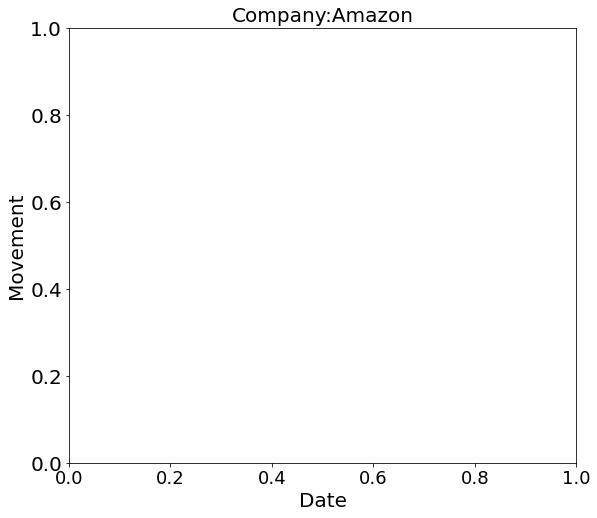

In [110]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title("Company:Amazon",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Movement",fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title("Company:Apple",fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel("Date",fontsize = 20)
plt.ylabel("Movement",fontsize = 20)
plt.plot(movements[1])


In [114]:
# Define a normalizer
normalizer = Normalizer()
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
labels = pipeline.predict(movements)

In [115]:
df1 = pd.DataFrame({"labels":labels,"companies":list(companies_dict)}).sort_values(by=["labels"],axis = 0)

ValueError: arrays must all be same length

In [117]:
# Define a normalizer
normalizer = Normalizer()
# Reduce the data
reduced_data = PCA(n_components = 2)
# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)
# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)
# Fit pipeline to daily stock movements
pipeline.fit(movements)
# Prediction
labels = pipeline.predict(movements)
# Create dataframe to store companies and predicted labels


In [118]:
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)
# Define step size of mesh
h = 0.01
# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# Define color plot
cmap = plt.cm.Paired

In [119]:
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)

ValueError: arrays must all be same length

In [124]:
df1 = pd.DataFrame({"labels":labels,"companies":list(companies_dict)}).sort_values(by=["labels"],axis = 0)


ValueError: arrays must all be same length

<Figure size 432x288 with 0 Axes>

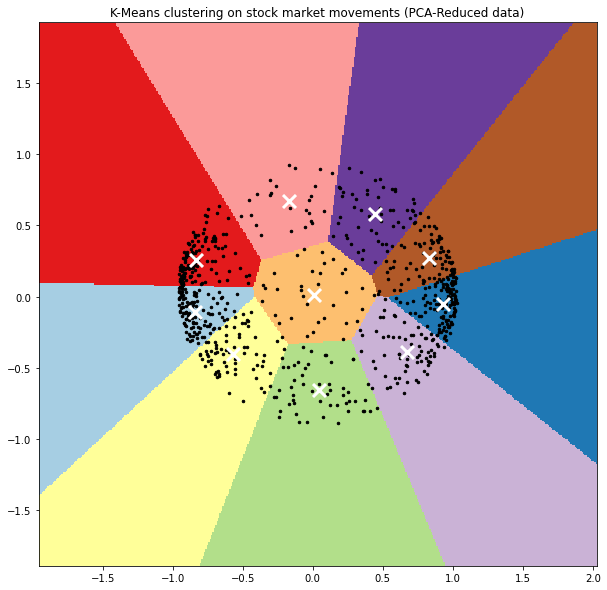

In [120]:
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = "nearest",extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = "auto",origin = "lower")
plt.plot(reduced_data[:,0],reduced_data[:,1],"k.",markersize = 5)
# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = "x",s = 169,linewidths = 3,color = "w",zorder = 10)
plt.title("K-Means clustering on stock market movements (PCA-Reduced data)")
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()